Saving 1.1.12.tiff to 1.1.12 (5).tiff


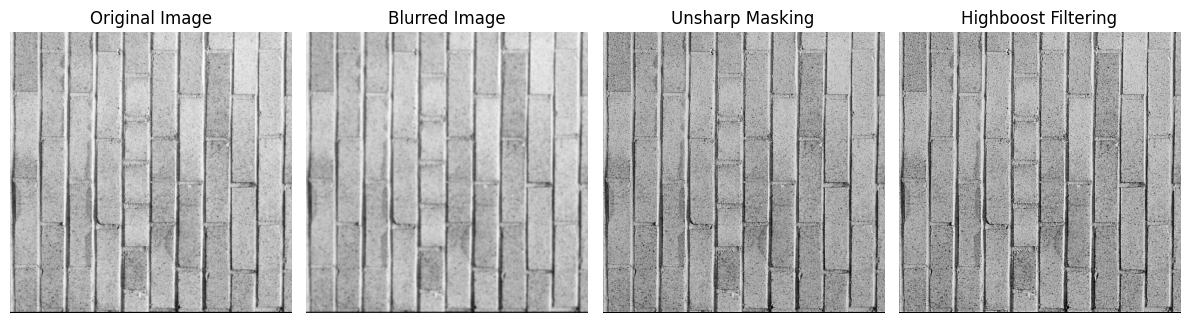

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def gaussian_kernel(size, sigma):
    """Create a Gaussian kernel given a size and sigma."""
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    kernel = kernel / (2*3.14*np.square(sigma))

    # Normalizes the generated kernel by dividing all its values by the sum of all values in the kernel. This ensures that the sum of the kernel values is 1,for better brightness
    return kernel / np.sum(kernel)

def apply_filter(image_array, kernel):
    """Apply a filter to an image using convolution."""
    height, width = image_array.shape
    kernel_height, kernel_width = kernel.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    padded_image = np.pad(image_array, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')
    new_image = np.zeros(image_array.shape)

    for i in range(height):
        for j in range(width):
            new_image[i, j] = np.sum(kernel * padded_image[i:i+kernel_height, j:j+kernel_width])
    return new_image

def unsharp_masking_and_highboost_filtering(image_array, kernel_size=5, sigma=1.0, alpha=1.5):
    """Perform unsharp masking and highboost filtering on an image array."""
    # Create Gaussian blur kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Apply Gaussian blur to the image
    blurred_array = apply_filter(image_array, kernel)

    # Create the mask
    mask = image_array - blurred_array

    # Unsharp masking
    sharpened_array = image_array + mask

    # Highboost filtering
    highboost_array = image_array + alpha * mask

    # Normalize the results
    sharpened_array = np.clip(sharpened_array, 0, 255)
    highboost_array = np.clip(highboost_array, 0, 255)

    return blurred_array, sharpened_array, highboost_array

# Upload an image file
uploaded = files.upload()
filename = next(iter(uploaded))

# Load the image and convert to grayscale
original_image = Image.open(filename).convert('L')
original_array = np.array(original_image, dtype=np.float32)

# Perform unsharp masking and highboost filtering
blurred_array, sharpened_array, highboost_array = unsharp_masking_and_highboost_filtering(original_array)

# Convert arrays back to images
blurred_image = Image.fromarray(blurred_array.astype(np.uint8))
sharpened_image = Image.fromarray(sharpened_array.astype(np.uint8))
highboost_image = Image.fromarray(highboost_array.astype(np.uint8))

# Plot and show the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Unsharp Masking')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(highboost_image, cmap='gray')
plt.title('Highboost Filtering')
plt.axis('off')

plt.tight_layout()
plt.show()


Please upload an image file:


Saving 1.1.12.tiff to 1.1.12 (4).tiff


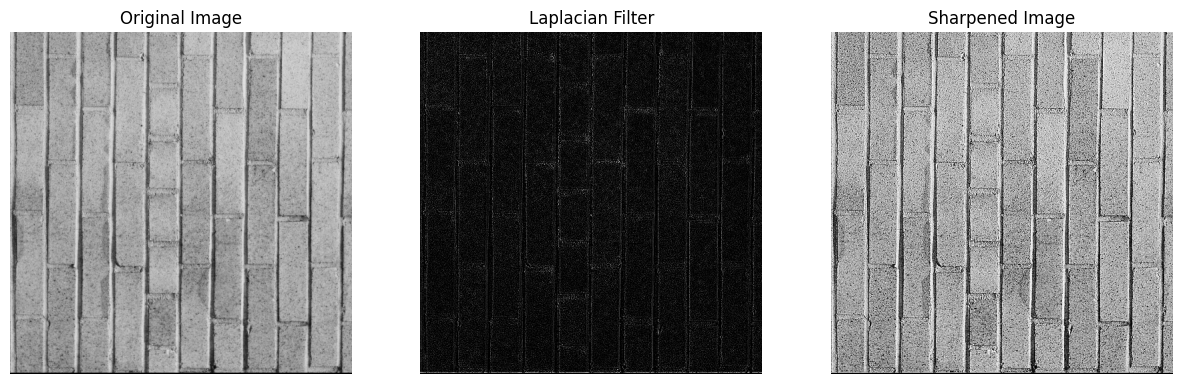

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def upload_image():
    uploaded = files.upload()
    filename = next(iter(uploaded))
    return filename

def read_image(file_path):
    with open(file_path, 'rb') as file:
        image = plt.imread(file)
    return image

def apply_laplacian_filter(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])
    result = np.zeros(image.shape)
    padded_image = np.pad(image, [(1, 1), (1, 1), (0, 0)], mode='edge')

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                result[i, j, k] = np.sum(kernel * padded_image[i:i+3, j:j+3, k])

    return result

def sharpen_image(original, laplacian):
    # Clip values to ensure they're in the 0-255 range and convert to uint8
    sharpened = np.clip(original + laplacian, 0, 255).astype(np.uint8)
    return sharpened

# Upload and read the image
print("Please upload an image file:")
filename = upload_image()
original_image = read_image(filename)

# Check if the image is grayscale and convert it to a 3-channel image by stacking
if len(original_image.shape) == 2 or original_image.shape[2] == 1:
    original_image = np.stack((original_image,) * 3, axis=-1)

# Apply the Laplacian filter and sharpen the image
laplacian_image = apply_laplacian_filter(original_image)
sharpened_image = sharpen_image(original_image, laplacian_image)

# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.clip(laplacian_image, 0, 255).astype(np.uint8))
plt.title('Laplacian Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.axis('off')

plt.show()


Please upload an image file:


Saving 1.1.12.tiff to 1.1.12 (1).tiff


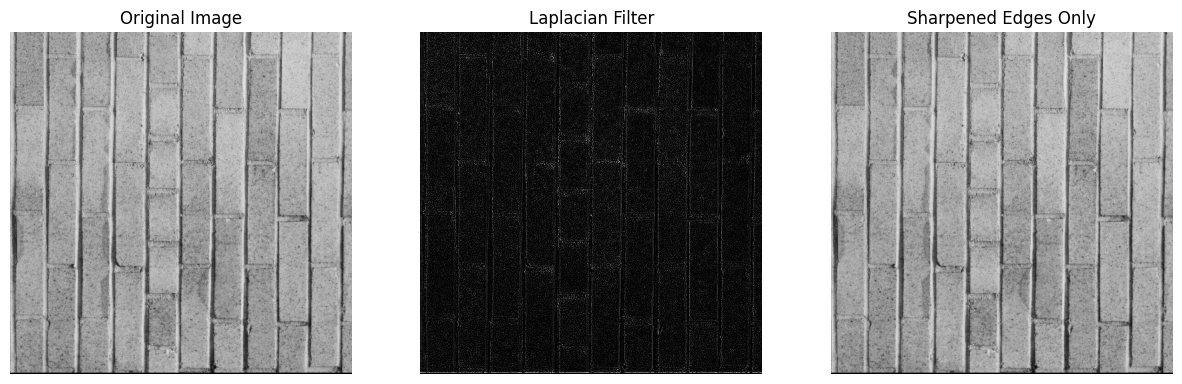

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def upload_image():
    uploaded = files.upload()
    filename = next(iter(uploaded))
    return filename

def read_image(file_path):
    with open(file_path, 'rb') as file:
        image = plt.imread(file)
    return image

def apply_laplacian_filter(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])
    result = np.zeros(image.shape)
    padded_image = np.pad(image, [(1, 1), (1, 1), (0, 0)], mode='edge')

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                result[i, j, k] = np.sum(kernel * padded_image[i:i+3, j:j+3, k])

    return result

def sharpen_edges_only(original, laplacian):
    # Threshold to determine edges
    threshold = np.max(laplacian)*0.5
    sharpened = np.copy(original)

    # Add the laplacian filter only on edges
    edges = np.abs(laplacian) > threshold
    sharpened[edges] = np.clip(original[edges] + laplacian[edges], 0, 255).astype(np.uint8)

    return sharpened

# Upload and read the image
print("Please upload an image file:")
filename = upload_image()
original_image = read_image(filename)

# Check if the image is grayscale and convert it to a 3-channel image by stacking
if len(original_image.shape) == 2 or (original_image.shape[2] == 1):
    original_image = np.stack((original_image,) * 3, axis=-1)

# Apply the Laplacian filter and sharpen the image only on edges
laplacian_image = apply_laplacian_filter(original_image)
sharpened_image = sharpen_edges_only(original_image, laplacian_image)

# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.clip(laplacian_image, 0, 255).astype(np.uint8))
plt.title('Laplacian Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image)
plt.title('Sharpened Edges Only')
plt.axis('off')

plt.show()


## HW SALT_PEPPER

Saving 1.1.12.tiff to 1.1.12 (1).tiff


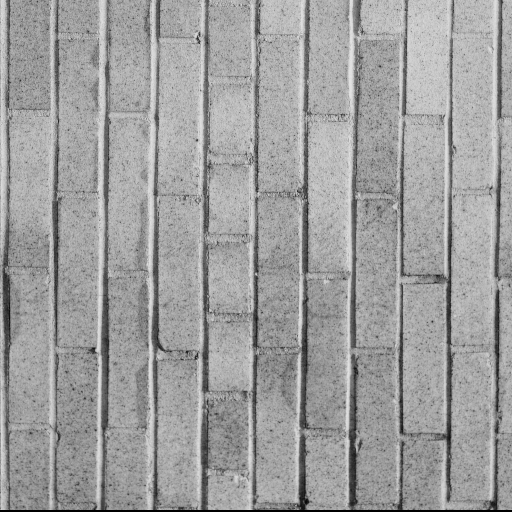

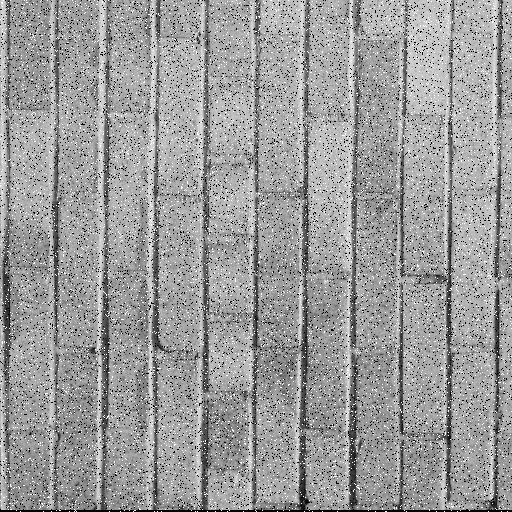

In [ ]:
# Import necessary libraries
from google.colab import files
from io import BytesIO
from PIL import Image
import numpy as np
import random

# Function to add salt and pepper noise
def salt_pepper_noise(image, salt_prob, pepper_prob):
    # Convert image to array
    img_array = np.array(image)

    # Apply noise
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            random_number = random.random()
            if random_number < salt_prob:
                img_array[i][j] = 255  # White pixel
            elif random_number > 1 - pepper_prob:
                img_array[i][j] = 0    # Black pixel

    # Convert array back to image
    noisy_image = Image.fromarray(img_array)
    return noisy_image

# Upload image
uploaded = files.upload()
if not uploaded:
    print("File not uploaded.")
else:
    for fn in uploaded.keys():
        # Open the image
        image = Image.open(BytesIO(uploaded[fn]))

        # Convert to grayscale (optional, depending on your need)
        image = image.convert('L')

        # Apply salt and pepper noise
        # Adjust salt_prob and pepper_prob as needed
        noisy_image = salt_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05)

        # Display the original and noisy image
        display(image, noisy_image)


In [ ]:
def apply_laplacian_filter(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])
    result = np.zeros(image.shape)
    padded_image = np.pad(image, [(1, 1), (1, 1), (0, 0)], mode='edge')

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                result[i, j, k] = np.sum(kernel * padded_image[i:i+3, j:j+3, k])

    return result

def sharpen_image(original, laplacian):
    # Clip values to ensure they're in the 0-255 range and convert to uint8
    sharpened = np.clip(original + laplacian, 0, 255).astype(np.uint8)
    return sharpened


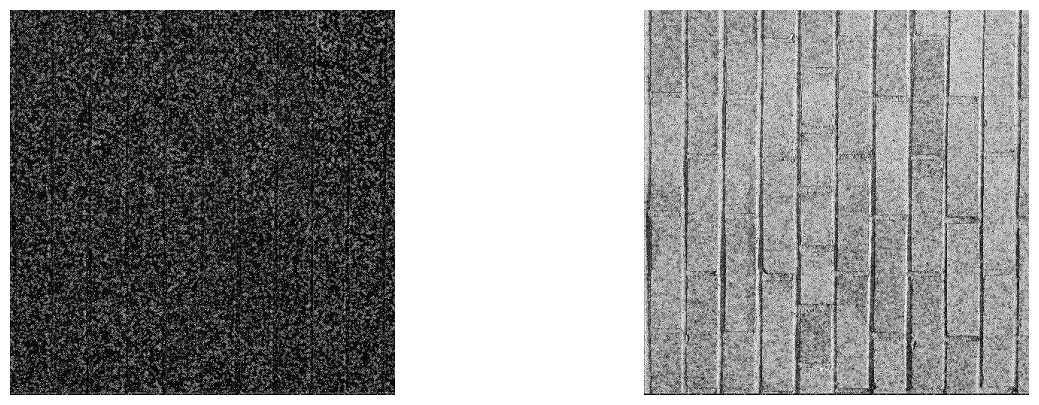

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Assuming noisy_image is a PIL Image object
if noisy_image.mode == 'L':  # 'L' indicates a grayscale image
    # Convert it to a 3-channel image by duplicating the grayscale channel
    noisy_image = noisy_image.convert('RGB')

# Now, if you need to work with the shape or perform array-based operations,
# convert the PIL Image to a NumPy array
noisy_image_np = np.array(noisy_image)

# You can now access the shape attribute
if len(noisy_image_np.shape) == 2 or (noisy_image_np.shape[2] == 1):
    noisy_image_np = np.stack((noisy_image_np,) * 3, axis=-1)

# Apply the Laplacian filter and sharpen the image only on edges
laplacian_image = apply_laplacian_filter(noisy_image_np)

sharpened_image = sharpen_image(noisy_image_np, laplacian_image)


# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.clip(laplacian_image, 0, 255).astype(np.uint8))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.axis('off')

plt.show()


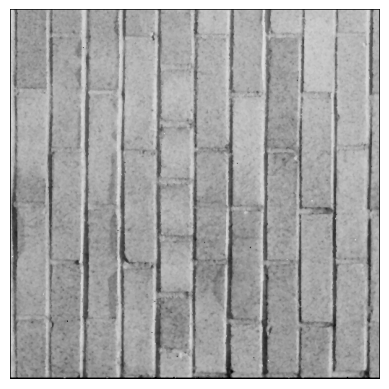

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def median_filter(input_image, kernel_size):
    # Convert the image to a numpy array
    img_array = np.array(input_image)
    # Prepare an empty array to hold the output
    output_array = np.zeros(img_array.shape)

    # Compute the margin to be considered around each pixel (based on the kernel size)
    margin = kernel_size // 2

    # Iterate over each pixel in the image
    for i in range(margin, img_array.shape[0] - margin):
        for j in range(margin, img_array.shape[1] - margin):
            # Extract the neighborhood around the pixel
            neighborhood = img_array[i - margin:i + margin + 1, j - margin:j + margin + 1]
            # Compute the median of the neighborhood
            median_value = np.median(neighborhood)
            # Set the median value as the new pixel value
            output_array[i, j] = median_value

    # Convert the output array back to an image
    output_image = Image.fromarray(output_array.astype('uint8'))
    return output_image

# Example usage
# Assuming noisy_image is already a PIL.Image object and is in grayscale
filtered_image = median_filter(noisy_image, kernel_size=3)  # You can change the kernel size

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers
plt.show()


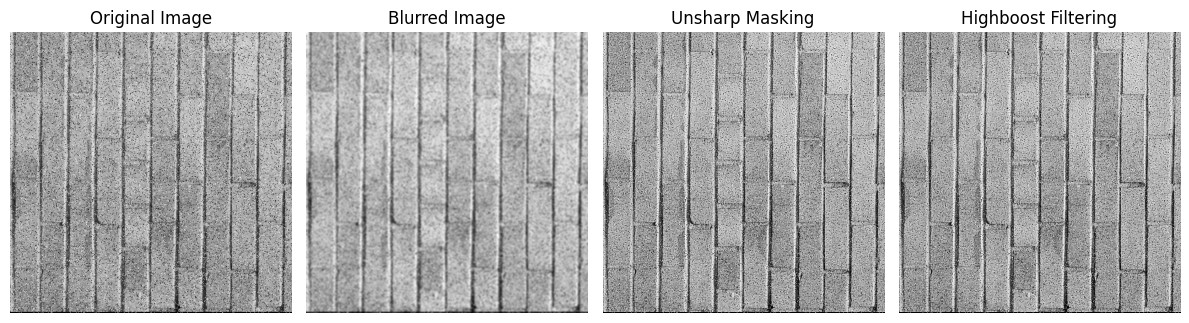

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import cv2

def gaussian_kernel(size, sigma):
    """Create a Gaussian kernel given a size and sigma."""
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    kernel = kernel / (2*3.14*np.square(sigma))

    # Normalizes the generated kernel by dividing all its values by the sum of all values in the kernel. This ensures that the sum of the kernel values is 1,for better brightness
    return kernel / np.sum(kernel)

def apply_filter(image_array, kernel):
    """Apply a filter to an image using convolution."""
    height, width = image_array.shape
    kernel_height, kernel_width = kernel.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    padded_image = np.pad(image_array, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')
    new_image = np.zeros(image_array.shape)

    for i in range(height):
        for j in range(width):
            new_image[i, j] = np.sum(kernel * padded_image[i:i+kernel_height, j:j+kernel_width])
    return new_image

def unsharp_masking_and_highboost_filtering(image_array, kernel_size=5, sigma=1.5, alpha=1):
    """Perform unsharp masking and highboost filtering on an image array."""
    # Create Gaussian blur kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Apply Gaussian blur to the image
    blurred_array = apply_filter(image_array, kernel)

    # Create the mask
    mask = image_array - blurred_array

    # Unsharp masking
    sharpened_array = image_array + mask

    # Highboost filtering
    highboost_array = image_array + alpha * mask

    # Normalize the results
    sharpened_array = np.clip(sharpened_array, 0, 255)
    highboost_array = np.clip(highboost_array, 0, 255)

    return blurred_array, sharpened_array, highboost_array

# Convert the image to grayscale if it's a color image
if len(noisy_image_np.shape) == 3:
    noisy_image_np = cv2.cvtColor(noisy_image_np, cv2.COLOR_BGR2GRAY)

# Now apply your filter as before


# Load the image and convert to grayscale
original_array = np.array(noisy_image, dtype=np.float32)

# Perform unsharp masking and highboost filtering
blurred_array, sharpened_array, highboost_array = unsharp_masking_and_highboost_filtering(noisy_image_np)

# Convert arrays back to images
blurred_image = Image.fromarray(blurred_array.astype(np.uint8))
sharpened_image = Image.fromarray(sharpened_array.astype(np.uint8))
highboost_image = Image.fromarray(highboost_array.astype(np.uint8))


# Plot and show the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Unsharp Masking')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(highboost_image, cmap='gray')
plt.title('Highboost Filtering')
plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
e